Fitting 5 folds for each of 9 candidates, totalling 45 fits
MSE (Erro Quadrático Médio) do modelo: 8.52146


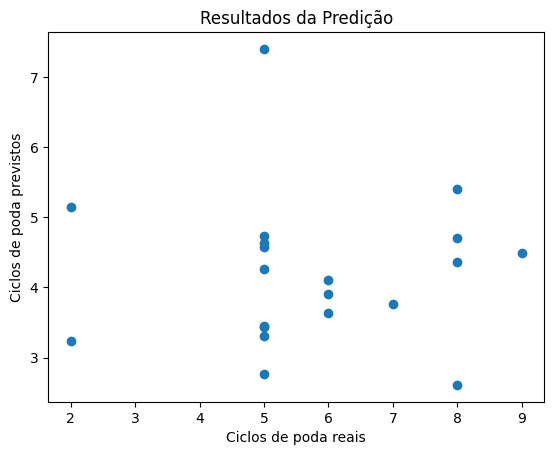

Modelo salvo em: modelo_predicao_ciclos_poda.pkl


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib

class TreePruningOptimizer:
    def __init__(self):
        self.modelo_predicao_ciclos_poda = RandomForestRegressor()
        self.dados_treinamento = None
        self.labels = None

    def preparar_dados(self):
        # Simulação de dados de treinamento (características e rótulos)
        np.random.seed(0)
        self.dados_treinamento = np.random.rand(100, 5)  # Exemplo: características das árvores
        self.labels = np.random.randint(1, 10, size=100)  # Exemplo: ciclos de poda necessários

    def treinar_modelo_predicao_ciclos_poda(self):
        # Dividir os dados em conjuntos de treinamento e teste
        X_train, X_test, y_train, y_test = train_test_split(self.dados_treinamento, self.labels, test_size=0.2, random_state=42)

        # Otimização de hiperparâmetros usando Grid Search Cross-Validation
        parametros_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
        grid_search = GridSearchCV(self.modelo_predicao_ciclos_poda, parametros_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
        grid_search.fit(X_train, y_train)

        # Melhor modelo após a otimização
        self.modelo_predicao_ciclos_poda = grid_search.best_estimator_

        # Avaliar o desempenho do modelo
        y_pred = self.modelo_predicao_ciclos_poda.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"MSE (Erro Quadrático Médio) do modelo: {mse}")

    def visualizar_resultados(self, X_test, y_test):
        # Visualização dos resultados da predição
        y_pred = self.modelo_predicao_ciclos_poda.predict(X_test)
        plt.scatter(y_test, y_pred)
        plt.xlabel("Ciclos de poda reais")
        plt.ylabel("Ciclos de poda previstos")
        plt.title("Resultados da Predição")
        plt.show()

    def salvar_modelo(self, caminho_arquivo):
        # Persistir o modelo treinado para uso futuro
        joblib.dump(self.modelo_predicao_ciclos_poda, caminho_arquivo)
        print(f"Modelo salvo em: {caminho_arquivo}")

# Exemplo de uso
optimizer = TreePruningOptimizer()
optimizer.preparar_dados()
optimizer.treinar_modelo_predicao_ciclos_poda()

# Simulação de dados de teste (para visualização dos resultados)
X_test = np.random.rand(20, 5)
y_test = np.random.randint(1, 10, size=20)
optimizer.visualizar_resultados(X_test, y_test)

# Salvar o modelo treinado
optimizer.salvar_modelo("modelo_predicao_ciclos_poda.pkl")
